<a href="https://colab.research.google.com/github/ayhem18/My_Kaggle_Repo/blob/master/Competitions/Titanic_survival/titanic_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
This is my 2nd attempt to solve the data science challenge: predicting Titanic survival on [Kaggle](https://www.kaggle.com/competitions/titanic).
I got inspired by this great [notebook](https://www.kaggle.com/code/kenjee/titanic-project-example/notebook) as it served as my starting point in this overwhelming journey.

## Preliminary work: imports and loading data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

In [5]:
# set the local location of the datasets
train_file = os.path.join("sample_data", "datasets", "train.csv")
test_file = os.path.join("sample_data", "datasets", "test.csv")

In [6]:
df_train_org = pd.read_csv(train_file)
df = df_train_org.copy()# .set_index("PassengerId")
print(df.head())
df_test_org = pd.read_csv(test_file)
df_test = df_test_org.copy()# .set_index("PassengerId")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
df['train'] = pd.Series([1 for _ in range(len(df) + 1)])
df_test['train'] = pd.Series([0.0 for _ in range(len(df_test) + 1)])

In [8]:
df = df.set_index('PassengerId')
df_test = df_test.set_index("PassengerId")


In [9]:
all_data = pd.concat([df,df_test], ignore_index=True)
print(all_data)

      Survived  Pclass                                               Name  \
0          0.0       3                            Braund, Mr. Owen Harris   
1          1.0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2          1.0       3                             Heikkinen, Miss. Laina   
3          1.0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4          0.0       3                           Allen, Mr. William Henry   
...        ...     ...                                                ...   
1304       NaN       3                                 Spector, Mr. Woolf   
1305       NaN       1                       Oliva y Ocana, Dona. Fermina   
1306       NaN       3                       Saether, Mr. Simon Sivertsen   
1307       NaN       3                                Ware, Mr. Frederick   
1308       NaN       3                           Peter, Master. Michael J   

         Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embark

In [10]:
all_data = all_data.rename(mapper=str.lower, axis=1) 
all_data = all_data.rename(columns={"survived":"y", "embarked":"from", "pclass":"c"})

## Exploring The data
In this section, I will explore the data and consider the different contributions of each feature in the final prediction.

### Engineering the fam_name
The name feature as it is might not be of major relevance. However, that does not mean it does not bring any valuable insights.

In [11]:
# what matters here in the name is the first part representing the family name
all_data['fam_name'] = all_data['name'].apply(lambda x: re.sub('.;:?', ",", x).strip().lower().split(",")[0]) 
# print(all_data['fam_name'])

fam_sizes = all_data.pivot_table(columns='y', index='fam_name', values='ticket', aggfunc='count')
# print(fam_sizes)

In [12]:
fam_sizes = all_data['fam_name'].value_counts() 

all_data['fam_size'] = all_data['fam_name'].apply(lambda x: fam_sizes[x])


In [13]:
df = all_data[all_data['train'] == 1].copy()

### Exploring and visualizing the numerical features

In [14]:
X_num_names = ["y", "c", "age", "sibsp", "parch", "fare"]
X_cat_names = ["name", "sex", "ticket", "cabin", "from"]
df_num = df.loc[:, X_num_names]
df_cat = df.loc[:, X_cat_names]

In [15]:
df_num.describe()

,y,c,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


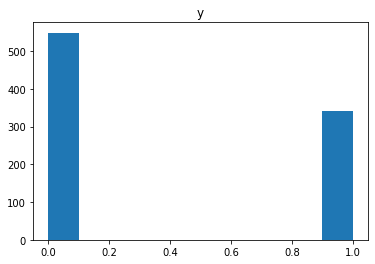

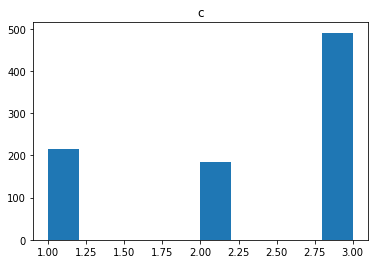

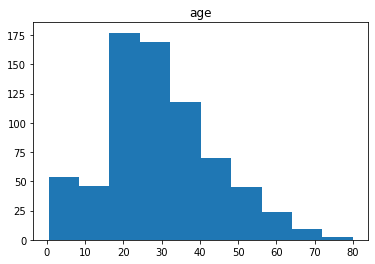

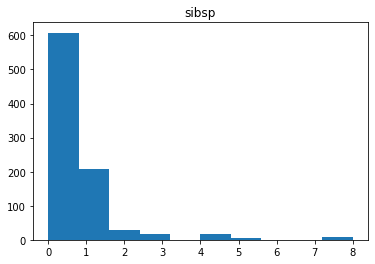

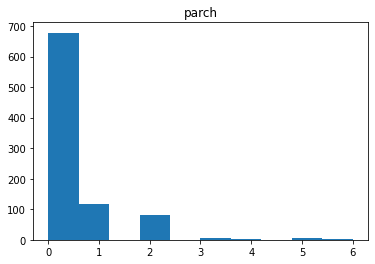

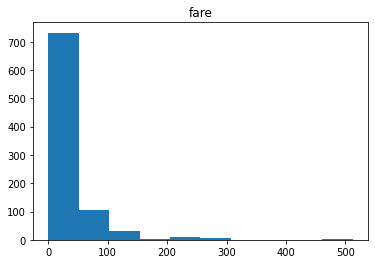

In [16]:
for col in df_num.columns:
    plt.hist(df_num[col])
    plt.title(col)
    plt.show()

In [17]:
df_survive = df.drop('train', axis=1)[df['y']==1]
print(df_survive.describe())
print("#" * 50)
df_dead = df.drop('train', axis=1)[df['y'] == 0]
print(df_dead.describe())

           y           c         age       sibsp       parch        fare  \
count  342.0  342.000000  290.000000  342.000000  342.000000  342.000000   
mean     1.0    1.950292   28.343690    0.473684    0.464912   48.395408   
std      0.0    0.863321   14.950952    0.708688    0.771712   66.596998   
min      1.0    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      1.0    1.000000   19.000000    0.000000    0.000000   12.475000   
50%      1.0    2.000000   28.000000    0.000000    0.000000   26.000000   
75%      1.0    3.000000   36.000000    1.000000    1.000000   57.000000   
max      1.0    3.000000   80.000000    4.000000    5.000000  512.329200   

         fam_size  
count  342.000000  
mean     2.222222  
std      1.585409  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max     11.000000  
##################################################
           y           c         age       sibsp       parch        fare  \
count  5

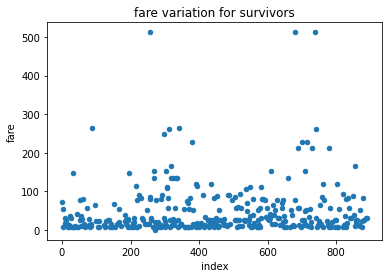

In [18]:
df_survive.reset_index().plot(kind='scatter', x='index', y='fare', title='fare variation for survivors')

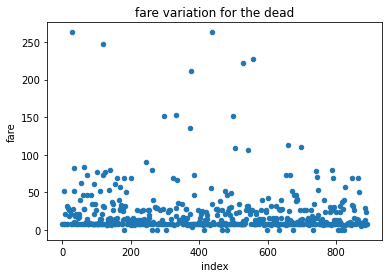

In [19]:
df_dead.reset_index().plot(kind='scatter', x='index', y='fare', title='fare variation for the dead')

#### The Fare feature
The fare feature is quite an interesting feature as it interacts with a most of the features in the dataset. A careful investigation might reveal a number of useful and significant interactions.

In [20]:
df_ultra_rich = df.drop(['ticket', 'name', 'train', 'cabin', 'from', 'fam_name'], axis=1)[df['fare'] >= 200]
print(df_ultra_rich[df_ultra_rich['y'] != 0])
print("**" * 100)
print(df_ultra_rich[df_ultra_rich['y'] == 0]) 

## so if the passengers are ultra rich, then a female has quite high probability of surviving.
## the males with the most expensive fares are the ones to survive.

       y  c     sex   age  sibsp  parch      fare  fam_size
88   1.0  1  female  23.0      3      2  263.0000         6
258  1.0  1  female  35.0      0      0  512.3292         1
299  1.0  1  female  50.0      0      1  247.5208         2
311  1.0  1  female  18.0      2      2  262.3750         5
341  1.0  1  female  24.0      3      2  263.0000         6
380  1.0  1  female  42.0      0      0  227.5250         1
679  1.0  1    male  36.0      0      1  512.3292         2
689  1.0  1  female  15.0      0      1  211.3375         1
700  1.0  1  female  18.0      1      0  227.5250         2
716  1.0  1  female  38.0      0      0  227.5250         1
730  1.0  1  female  29.0      0      0  211.3375         2
737  1.0  1    male  35.0      0      0  512.3292         1
742  1.0  1  female  21.0      2      2  262.3750         5
779  1.0  1  female  43.0      0      1  211.3375         1
****************************************************************************************************

In [21]:
# let's consider the passengers paying fare in the range [100, 200]
df_rich = df.drop(['ticket', 'name', 'train', 'cabin', 'from', 'fam_name'], axis=1)[(df['fare'] >= 100) & (df['fare'] <200)]
print(df_rich[df_rich['y'] == 1])
print("*" * 100)
print(df_rich[df_rich['y'] == 0])

       y  c     sex    age  sibsp  parch      fare  fam_size
31   1.0  1  female    NaN      1      0  146.5208         2
195  1.0  1  female  58.00      0      0  146.5208         1
215  1.0  1  female  31.00      1      0  113.2750         3
268  1.0  1  female  58.00      0      1  153.4625         3
269  1.0  1  female  35.00      0      0  135.6333         1
305  1.0  1    male   0.92      1      2  151.5500         4
306  1.0  1  female    NaN      0      0  110.8833         2
307  1.0  1  female  17.00      1      0  108.9000         2
318  1.0  1  female  31.00      0      2  164.8667         3
319  1.0  1  female  40.00      1      1  134.5000         3
325  1.0  1  female  36.00      0      0  135.6333         1
334  1.0  1  female    NaN      1      0  133.6500         3
337  1.0  1  female  41.00      0      0  134.5000         2
390  1.0  1    male  36.00      1      2  120.0000         6
393  1.0  1  female  23.00      1      0  113.2750         3
435  1.0  1  female  14.

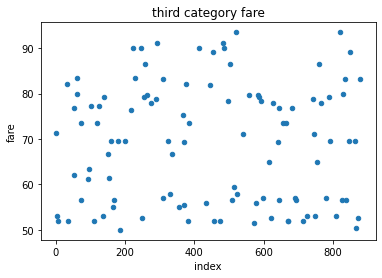

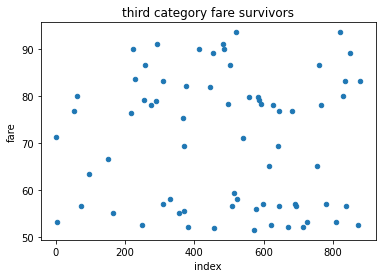

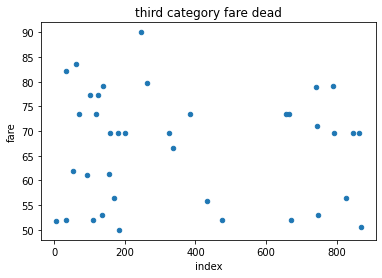

In [22]:
df_3 = df.drop(['ticket', 'name', 'train', 'cabin', 'from', 'fam_name'], axis=1)[(df['fare'] >= 50) & (df['fare'] <100)]
df_3.reset_index().plot(kind='scatter', x='index', y='fare', title='third category fare')
df_3_sur = df_3[df_3['y'] == 1]
df_3_dead = df_3[df_3['y'] == 0]
df_3_sur.reset_index().plot(kind='scatter', x='index', y='fare', title = 'third category fare survivors')
df_3_dead.reset_index().plot(kind='scatter', x='index', y='fare', title = 'third category fare dead')

In [23]:
print(df_3_sur.describe())
print(df_3_dead.describe())

          y          c        age      sibsp      parch       fare   fam_size
count  70.0  70.000000  62.000000  70.000000  70.000000  70.000000  70.000000
mean    1.0   1.171429  35.983871   0.600000   0.314286  70.381669   1.957143
std     0.0   0.537612  13.310284   0.521981   0.602960  13.862542   0.907868
min     1.0   1.000000   4.000000   0.000000   0.000000  51.479200   1.000000
25%     1.0   1.000000  25.250000   0.000000   0.000000  56.495800   1.000000
50%     1.0   1.000000  35.000000   1.000000   0.000000  73.266650   2.000000
75%     1.0   1.000000  48.000000   1.000000   0.000000  81.393725   2.000000
max     1.0   3.000000  63.000000   2.000000   2.000000  93.500000   4.000000
          y          c        age      sibsp      parch       fare   fam_size
count  38.0  38.000000  28.000000  38.000000  38.000000  38.000000  38.000000
mean    0.0   1.605263  38.071429   2.000000   0.526316  66.817213   3.947368
std     0.0   0.855490  14.303402   2.959182   0.796507  11.1786

In [24]:
# print(df_3_sur['sex'].value_counts())
# print(df_3_dead['sex'].value_counts())
print(df_3[df_3['sex'] == 'male'][['y', 'fam_size', 'fare', 'age']].sort_values(['fam_size', 'y'], ascending=[False, False]))

       y  fam_size     fare   age
159  0.0        11  69.5500   NaN
201  0.0        11  69.5500   NaN
324  0.0        11  69.5500   NaN
846  0.0        11  69.5500   NaN
385  0.0         7  73.5000  18.0
155  0.0         5  61.3792  51.0
645  1.0         4  76.7292  48.0
62   0.0         4  83.4750  45.0
224  1.0         3  90.0000  38.0
445  1.0         3  81.8583   4.0
34   0.0         3  82.1708  28.0
102  0.0         3  77.2875  21.0
120  0.0         3  73.5000  21.0
124  0.0         3  77.2875  54.0
245  0.0         3  90.0000  44.0
262  0.0         3  79.6500  52.0
655  0.0         3  73.5000  24.0
665  0.0         3  73.5000  32.0
745  0.0         3  71.0000  70.0
97   1.0         2  63.3583  23.0
248  1.0         2  52.5542  37.0
370  1.0         2  55.4417  25.0
453  1.0         2  89.1042  49.0
484  1.0         2  91.0792  25.0
587  1.0         2  79.2000  60.0
599  1.0         2  56.9292  49.0
621  1.0         2  52.5542  42.0
690  1.0         2  57.0000  31.0
692  1.0      

In [25]:
df_4 = df.drop(['ticket', 'name', 'train', 'cabin', 'from', 'fam_name'], axis=1)[(df['fare'] < 50) & (df['fare'] >= 40)]
print(df_4)

       y  c     sex   age  sibsp  parch     fare  fam_size
43   1.0  2  female   3.0      1      2  41.5792         4
59   0.0  3    male  11.0      5      2  46.9000         8
71   0.0  3  female  16.0      5      2  46.9000         8
83   0.0  1    male  28.0      0      0  47.1000         2
386  0.0  3    male   1.0      5      2  46.9000         8
480  0.0  3    male   9.0      5      2  46.9000         8
493  0.0  1    male  71.0      0      0  49.5042         1
539  1.0  1  female  22.0      0      2  49.5000         1
583  0.0  1    male  36.0      0      0  40.1250         1
602  0.0  1    male   NaN      0      0  42.4000         1
608  1.0  2  female  22.0      1      2  41.5792         4
678  0.0  3  female  43.0      1      6  46.9000         8
683  0.0  3    male  14.0      5      2  46.9000         8
685  0.0  2    male  25.0      1      2  41.5792         4
710  1.0  1  female  24.0      0      0  49.5042         1


3    114
2     83
1     32
Name: c, dtype: int64
3    357
2     91
1     38
Name: c, dtype: int64


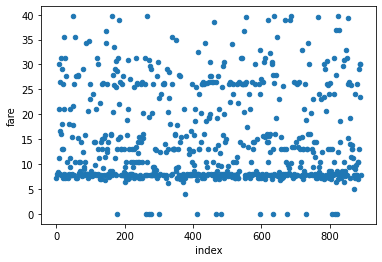

In [26]:
df_5 = df.drop(['ticket', 'name', 'train', 'cabin', 'from', 'fam_name'], axis=1)[(df['fare'] < 40)]
df_5.reset_index().plot(kind='scatter', x='index', y='fare')
print(df_5[df_5['y']==1]['c'].value_counts())
print(df_5[df_5['y']==0]['c'].value_counts())


In [27]:
fun_list = [pd.Series.count, np.sum, np.mean, np.std, np.max, np.min]

df_survived_class = df_survive.groupby("c").agg({"fare":fun_list})
df_dead_class = df_dead.groupby("c").agg({"fare":fun_list})
print(df_survived_class)
print(df_dead_class)


   fare                                                     
  count         sum       mean        std      amax     amin
c                                                           
1   136  13002.6919  95.608029  85.286820  512.3292  25.9292
2    87   1918.8459  22.055700  10.853502   65.0000  10.5000
3   119   1629.6916  13.694887  10.692993   56.4958   0.0000
   fare                                              
  count        sum       mean        std    amax amin
c                                                    
1    80  5174.7206  64.684007  60.662089  263.00  0.0
2    97  1882.9958  19.412328  15.307175   73.50  0.0
3   372  5085.0035  13.669364  12.118338   69.55  0.0


In [28]:
df_num.corr()

,y,c,age,sibsp,parch,fare
y,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
c,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Exploring and visualizing the Categorical features
As I considered the numerical features in the previous subsection, it is time to investigate the effect of the categorical ones.

#### Categorical features in general

In [29]:
print(pd.pivot_table(df, index='y', values=['c','age', 'fare'], aggfunc=[pd.Series.count, np.mean]))

    count                 mean                     
      age    c fare        age         c       fare
y                                                  
0.0   424  549  549  30.626179  2.531876  22.117887
1.0   290  342  342  28.343690  1.950292  48.395408


In [30]:
# comparing survivors' values with respect to categorical variables.
print(pd.pivot_table(df, index='y', columns=['c'], values='ticket', aggfunc='count'))
print(pd.pivot_table(df, index='y', columns=['sex'], aggfunc='count', values='ticket'))
print(pd.pivot_table(df, index='y', columns='from', aggfunc='count', values='ticket'))
# at first glance it might seem that passengers embarking from "C" are more likely to survive. Yet, it might be useful to consider
# the social class of people coming from the different stations.

print(pd.pivot_table(df, index='c', columns=['from'], values='name', aggfunc='count'))
# the last observation did not provide evidence to completely rool out the possibility of positive correlation between the embarkment 
# point and survival, more investigation is needed.


c      1   2    3
y                
0.0   80  97  372
1.0  136  87  119
sex  female  male
y                
0.0      81   468
1.0     233   109
from   C   Q    S
y                
0.0   75  47  427
1.0   93  30  217
from   C   Q    S
c                
1     85   2  127
2     17   3  164
3     66  72  353


In [31]:

# 0: male, 1: female
genre_mapper = {"male":0, "female":1}
all_data["sex"] = pd.Series([genre_mapper[x] for x in all_data['sex']])

from_mapper = {"C":1, "Q":2, "S":3}
all_data["from"] = pd.Series([from_mapper[x] if x in from_mapper else x for x in all_data["from"]])

all_data['from'] = all_data['from'].astype(float)
print(all_data.loc[:, ["y", "from"]].corr())

             y      from
y     1.000000 -0.169718
from -0.169718  1.000000


In [32]:
df = all_data[all_data['train'] == 1].copy()

In [33]:
# understand the relation between classes and the embarkment station
from_class_ana = df.groupby("from").agg({"c":['count', 'mean'], "fare":'mean'})
print(from_class_ana)
# so we can say the embarkment station has little to no correlation with the social class

print(pd.pivot_table(df, index='from',columns='c',values='ticket', aggfunc='count'))


         c                 fare
     count      mean       mean
from                           
1.0    168  1.886905  59.954144
2.0     77  2.909091  13.276030
3.0    644  2.350932  27.079812
c       1    2    3
from               
1.0    85   17   66
2.0     2    3   72
3.0   127  164  353


#### Cabin Feature
This subsection was created to better understand the cabin column. It is currently commented as no useful insight was extracted and the column is dropped later in the notebook.

In [34]:
# # understanding the cabin

# print(df["cabin"].isna().sum())
# print(df["cabin"].copy().dropna().count())
# so only 204 passengers bought cabins

In [35]:
# # we assume that the cabins are indeed separated by spaces
# df['num_cabins'] = df.cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))
# print(df.num_cabins.value_counts())
# # let's check the relation between number of cabins and social class
# print(pd.pivot_table(df, index='num_cabins', columns='c', values='ticket', aggfunc='count'))

#### Fare Column ...Again
In this subsection, I delve a bit deeper in the fare column to perceive the relationship of this feature with the rest of the categorial features: mainly the class feature. Most of the next cells are commented as the attempt to extract meaningful features did not produce desirable results.


***More investigation on this course of action might be needed.***

In [36]:
# understanding the fare column:
print (df.loc[:, ["fare"]].describe())
fare_s = df['fare']
fare_df = df.loc[:, ["fare"]]
# consider the nan values
print(fare_s.isna().sum())
# there is no nan values: such a delight !!!

print(fare_s[lambda x : x == 0].count())

             fare
count  891.000000
mean    32.204208
std     49.693429
min      0.000000
25%      7.910400
50%     14.454200
75%     31.000000
max    512.329200
0
15


In [37]:
# we can see that the survival probability is higher for upper social classes. However, It might be worth noting
# that the ticket's price: fare is as well influencial. In other words, a 3rd class passenger who paid more than a 1st passenger
# might be more likely to survive, let's consider this subtle detail: it might lead to a helpful feature

# df_no_fare = df[df['fare'] == 0]
# df_fare = df[df['fare'] != 0]
# fare_np = df_fare["fare"].values

# quantiles_values = [0, 0.25, 0.5, 0.75, 1]
# fare_quantiles = {}
# for i in range(1, 4):
#     fare_quantiles["fare_q_c" + str(i)] = np.quantile(df_fare[df_fare["c"] == i]["fare"].values, quantiles_values)

# for key, value in fare_quantiles.items():
#     print(str(key) + ": " + str(value)) 

# def quartile_number(value, quantiles):
#     # value assumed to be at least larger or equal then the lowest value
#     assert (value >= quantiles_values[0])
#     for i in range(len(quantiles) - 1):
#         if value >= quantiles[i] and value < quantiles[i + 1]:
#             return i + 1
#     return len(quantiles) - 1 

# def classify_passenger(row):
#     return quartile_number(row['fare'], fare_quantiles["fare_q_c" + str(int(row['c']))])    


# df_fare['quartile_class'] = df_fare.loc[:, ['fare', 'c']].apply(lambda row: classify_passenger(row), axis=1)
# print(df_fare.loc[:, ['fare', 'c', 'quartile_class']].head(15))



In [38]:

# fare_class_quartile_effect = pd.pivot_table(df_fare, index='y', columns=['c','quartile_class'], values='name', aggfunc='count')
# print(fare_class_quartile_effect)
# print("#" * 50)
# fare_class_quartile_effect.loc[2] = fare_class_quartile_effect.loc[1] / fare_class_quartile_effect.loc[0]
# print(fare_class_quartile_effect)

In [39]:
# the results are promissing and thus it is worthy experimenting with quartile class feature
# let's add the values to the all_data dataframe
# first impute the zero values with the column mean

fare_by_class_mean = all_data[all_data['fare'] > 0].groupby("c").agg({"fare": np.mean}).squeeze()
print(fare_by_class_mean)


def fill_up_fare(row):
    if row['fare'] == 0 or np.isnan(row['fare']):
        row['fare'] = fare_by_class_mean[row['c']]
    return row

# we can see that there is positive correlation between the quartile_class feature and survival
# it is necessary to impute the row: the mean seems like a reasonable choice

all_data = all_data.apply(lambda row: fill_up_fare(row) , axis=1)

print(all_data['fare'].isna().sum()) # there is no Nan values anymore
print(all_data[all_data['fare'] <= 0]['fare'].sum()) # there is no 0 fare values anymore



c
1    89.447482
2    21.648108
3    13.378473
Name: fare, dtype: float64
0
0.0


In [40]:
# now the quartile class should be added to the add_data DF
# quantiles_values = [0, 0.25, 0.5, 0.75, 1]
# fare_quantiles = {}
# for i in range(1, 4):
#     fare_quantiles["fare_q_c" + str(i)] = np.quantile(all_data[all_data["c"] == i]["fare"].values, quantiles_values)

# all_data['quartile_class'] = all_data.loc[:, ['fare', 'c']].apply(lambda row: classify_passenger(row), axis=1)

In [41]:
# print(df.loc[:, ["y", "num_cabins"]].corr())

# There are 3 features that might reflect in a passenger's social image:
# * class * fare * num_cabins
# let's consider each individually

# print((pd.pivot_table(df, index='y', columns=[ 'num_cabins', 'c'], values='ticket', aggfunc=['count'])))

In [42]:
## the number of cabins is quite a helpful feature as well so it seems reasonable to add it to the all_data df
# all_data['num_cabins'] = all_data.cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))


#### Engineering the Title feature
Once again with the name feature, The first term used to address is the title and can reflect a number of things such as social status, age...

In [43]:
# let's first consider the title associated with a passenger's name

df['title'] = df['name'].apply(lambda x: re.sub('[:?;.]', ",", x).split(",")[1].strip())

In [44]:
print(df.title.value_counts().index.sort_values())

Index(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
       'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess'],
      dtype='object')


In [45]:
# let's consider the non-uniform titles and their relevance to the survival
non_comm_title = df[df['title'].isin(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major','Rev', 'Sir', 'the Countess'])]
print(pd.pivot_table(non_comm_title, index='y', columns='title', values='ticket', aggfunc='count'))

title  Capt  Col  Don   Dr  Jonkheer  Lady  Major  Rev  Sir  the Countess
y                                                                        
0.0     1.0  1.0  1.0  4.0       1.0   NaN    1.0  6.0  NaN           NaN
1.0     NaN  1.0  NaN  3.0       NaN   1.0    1.0  NaN  1.0           1.0


In [46]:
# comm_title = df[df['title'].isin(['Master','Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms'])]
# print(pd.pivot_table(comm_title, index='y', columns='title', values='ticket', aggfunc='count'))

## Imputing Missing Values
It is known that machine learning models do not accept Nan values. Thus, imputing the missing values is a crucial preliminary step in the ML pipeline.

### Imputing Age
The age is highly correlated with the final prediction. Yet, it has a large number of missing values. A more careful imputing is needed. After investigating and little research, I decided to impute the age as follows:
1. for classes 1 and 2: fill the missing values with the mean age
2. for class 3: ages are grouped by title (as indicated later the two values are related), the missing values are filled with the mean of the group with the corresponding title.

In [47]:
# let's impute the age
print(df['age'].isna().sum())
print(len(df))

177
891


In [48]:
class_3_age = df[(~np.isnan(df['age'])) &(df['c'] == 3) ]['age'].values
print(np.nanstd(class_3_age))
print(np.amax(class_3_age), np.amin(class_3_age))

12.47778664731647
74.0 0.42


In [49]:
df_test = all_data[all_data['train'] != 1]
print(df_test['age'].isna().sum())

86


In [50]:
age_class = all_data.groupby('c').agg({"age":[np.mean, np.median]}).iloc[:, 0]
print(age_class)
# count the number of missing age values in each class 
print(all_data[np.isnan(all_data['age'])].groupby('c').agg({"name":'count'})) 
# as we can see there are only few values missing values for first and second class, thus it might not be harmful
# to fill the missing values with the class's mean age
# however, since the 3rd class has a large number of missing values, a more careful imputation might be needed.

c
1    39.159930
2    29.506705
3    24.816367
Name: (age, mean), dtype: float64
   name
c      
1    39
2    16
3   208


as we can see there 4 main titles associated with passenger from the 3rd class.
According to the following [link](https://prowritingaid.com/art/968/mr%2c-mrs%2c-ms-and-miss%3a-everything-you-need-to-know-about-titles.aspx), the title is generally associated with 
an age category or a matrial status (that indeed correlates with age...). It might be a good idea to associate these two features


In [51]:
# let's first consider the title associated with a passenger's name

all_data['title'] = all_data['name'].apply(lambda x: re.sub('[:?;.]', ",", x).split(",")[1].strip())


In [52]:
# let's fill the third class missing ages with the mean of the associated title
print(all_data[all_data['c'] == 3]['title'].value_counts())

title_age_class_3 = all_data[all_data['c'] == 3].groupby('title').agg({"age":np.nanmean}).iloc[:, 0]
print(title_age_class_3)

Mr        448
Miss      150
Mrs        65
Master     45
Ms          1
Name: title, dtype: int64
title
Master     6.090000
Miss      17.360874
Mr        28.318910
Mrs       32.326531
Ms              NaN
Name: age, dtype: float64


In [53]:
def fill_up_age_class_3(row):
    value1 = np.round(title_age_class_3[row['title']])
    value2 = np.round(age_class[row['c']]) # used only for one passenger with title Ms.
    if np.isnan(row['age']):
        row['age'] =  value2 if np.isnan(value1) else value1
    return row

def fill_up_age_class_1_2(row):
    if np.isnan(row['age']):
        row['age'] = np.round(age_class[row['c']])
    return row

def fill_up_age(row):
    if row['c'] == 3:
        return fill_up_age_class_3(row)
    return fill_up_age_class_1_2(row)

all_data = all_data.apply(fill_up_age, axis=1)

## Prepare the data for modeling
After engineering new features, imputing missing values and exploring different interactions, it is time to prepare the final dataframe for modeling.

### Dropping columns

In [54]:
# it is time to drop the unncessary columns
print(all_data.columns)

Index(['y', 'c', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'from', 'train', 'fam_name', 'fam_size', 'title'],
      dtype='object')


In [55]:
all_data = all_data.drop(['name', 'ticket', 'cabin', 'title','sibsp', 'parch', 'fam_name'], axis=1)

In [56]:
df_train = all_data[all_data['train'] == 1].copy()
df_test = all_data[all_data['train'] != 1].copy()
# df_train.dropna(subset=['from','age'], inplace=True) # drop nan values 

print(df_train.columns, df_test.columns)
df_train.dropna(subset=['from', 'age'], inplace=True)
X_train = df_train.drop(['train', 'y'],axis=1).values

y_train = df_train['y'].values
X_test = df_test.drop(['train', 'y'],axis=1).values

Index(['y', 'c', 'sex', 'age', 'fare', 'from', 'train', 'fam_size'], dtype='object') Index(['y', 'c', 'sex', 'age', 'fare', 'from', 'train', 'fam_size'], dtype='object')


### Scaling data (normalization)

In [57]:
# time to scale the data
# we can use the sklearn class for this

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [58]:
# try all the models baseline models I currently know
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

n_splits = 6
random_state = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

solver = 'liblinear'
lr = LogisticRegression(solver=solver)
cv_scores = cross_val_score(lr, X_train, y_train, cv=kf)
print(np.mean(cv_scores))

0.8030790857972065


## Models
It is time for the final phase in the Machine Learning pipeline: creating models for predicting the passengers' survival

### First set of Models
Let's start with basic models such as:
* Logistic regression
* KNN classifier
* SVM

In [59]:
from sklearn.svm import SVC

svm = SVC() # the non-linear SVM
cv_scores = cross_val_score(svm, X_train, y_train, cv=kf)
print(cv_scores)

[0.87919463 0.80405405 0.83783784 0.80405405 0.82432432 0.73648649]


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv_scores = cross_val_score(svm, X_train, y_train, cv=kf)
print(cv_scores)

[0.87919463 0.80405405 0.83783784 0.80405405 0.82432432 0.73648649]


In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2) 
cv_scores = cross_val_score(dt, X_train, y_train)
print(cv_scores)

[0.73595506 0.74157303 0.82022472 0.78089888 0.73446328]


In [62]:
from sklearn.metrics import accuracy_score
def model_best_version(model, model_name):
    print(model_name)
    print("parameters \n" + str(model.best_params_))
    print("best f1score \n" + str(model.best_score_))

### HyperTune the first set of models

In [63]:
from sklearn.model_selection import GridSearchCV

# tune the parameters
lamda = np.array([10 ** x for x in np.linspace(-5, 0.1)])

lr_params = {"max_iter": [2000], "penalty":['l2'], 'C': 1 / lamda, 'solver':['liblinear']}

lr_best = GridSearchCV(lr, param_grid=lr_params, cv=6, n_jobs=-1, scoring='f1')

lr_best.fit(X_train, y_train)

model_best_version(lr_best, "LogisticRegression")

LogisticRegression
parameters 
{'C': 36.754127913334756, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}
best f1score 
0.7279960170237149


In [64]:
knn_params = {'n_neighbors' : range(5, 20),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
knn_best = GridSearchCV(knn, param_grid = knn_params, cv = 6,  n_jobs = -1)
knn_best.fit(X_train,y_train)
model_best_version(knn_best, "KNN")

KNN
parameters 
{'algorithm': 'auto', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
best f1score 
0.8200465566237378


In [65]:
from sklearn.svm import SVC

svm_params = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10], 'C': 1 / lamda}]
# {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': 1 / lamda}]

svc_best = GridSearchCV(SVC(), param_grid=svm_params, cv=6, n_jobs=-1)
svc_best.fit(X_train, y_train)
model_best_version(svc_best, "NON-linear SVM")

NON-linear SVM
parameters 
{'C': 6.866488450042998, 'gamma': 0.1, 'kernel': 'rbf'}
best f1score 
0.8245435032347784


In [66]:
dt_params = {"max_depth": [2, 3,4,5,6], "min_samples_leaf": [0.02, 0.04, 0.05, 0.1, 0.12, 0.15], "max_features":["log2", "sqrt", None]}
dt_best = GridSearchCV(dt, param_grid=dt_params, cv=6, n_jobs=-1)
dt_best.fit(X_train, y_train)
model_best_version(dt_best, "DecisionTreeClassifier")

print(cross_val_score(dt_best, X_train, y_train, cv=kf).mean())


DecisionTreeClassifier
parameters 
{'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.05}
best f1score 
0.8110299897212649
0.8064423483886571


In [67]:
X_train_pred = dt_best.predict(X_train)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, X_train_pred))


[[523  26]
 [142 198]]


In [68]:
y_diff = pd.DataFrame(np.abs(X_train_pred - y_train), columns=['diff'])

y_diff = y_diff[y_diff['diff'] == 1]

train_mis = df_train.drop(['train'], axis=1).iloc[y_diff.index,:]

print(train_mis[train_mis['y'] == 1].head(20))
# print(train_mis[(train_mis['y'] == 0.0) & (train_mis['quartile_class'].isin([3,4]))])
# print("#" * 100)

# print(train_mis[(train_mis['y'] == 1.0) & (train_mis['quartile_class']).isin([1,2])])


       y  c  sex    age     fare  from  fam_size
2    1.0  3    1  26.00   7.9250   3.0         1
8    1.0  3    1  27.00  11.1333   3.0         6
10   1.0  3    1   4.00  16.7000   3.0         3
17   1.0  2    0  30.00  13.0000   3.0         5
21   1.0  2    0  34.00  13.0000   3.0         1
23   1.0  1    0  28.00  35.5000   3.0         1
25   1.0  3    1  38.00  31.3875   3.0         8
36   1.0  3    0  28.00   7.2292   1.0         1
55   1.0  1    0  39.00  35.5000   3.0         1
65   1.0  3    0   6.00  15.2458   1.0         3
68   1.0  3    1  17.00   7.9250   3.0        11
74   1.0  3    0  32.00  56.4958   3.0         1
78   1.0  2    0   0.83  29.0000   3.0         3
79   1.0  3    1  30.00  12.4750   3.0         1
81   1.0  3    0  29.00   9.5000   3.0         1
85   1.0  3    1  33.00  15.8500   3.0         2
97   1.0  1    0  23.00  63.3583   1.0         2
106  1.0  3    1  21.00   7.6500   3.0         1
107  1.0  3    0  28.00   7.7750   3.0         1
125  1.0  3    0  12

In [69]:
# gather submissions
lr_pred = lr_best.predict(X_test)
knn_pred = knn_best.predict(X_test)
dt_pred = dt_best.predict(X_test)


# sub_1 = pd.DataFrame({"PassengerId": df_test_org['PassengerId'], "Survived": lr_pred}).astype(int)
sub_knn = pd.DataFrame({"PassengerId": df_test_org['PassengerId'],"Survived": knn_pred}).astype(int)
sub_dt = pd.DataFrame({"PassengerId": df_test_org['PassengerId'],"Survived": dt_pred}).astype(int)
# sub_1.to_csv("sub1.csv", index=False)
sub_knn.to_csv("sub_knn.csv", index=False)
sub_dt.to_csv("sub_dt.csv", index=False)


### More Sophisticated Models: RandomForest and XGboost Classifier

### Random Forest

In [70]:
# let's consider more complicated models such as Random Forests model.
from sklearn.ensemble import RandomForestClassifier
# rf_basic = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV

# let's try to tune a RandomForest model
rf = RandomForestClassifier()
print(rf.get_params())


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [71]:

rf_params = {'max_depth':[4, 5, 6, 7, 8], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf':[0.02, 0.03, 0.04, 0.05, 0.08, 0.1]
, 'max_samples':[0.8, 0.85, 0.9, 1]}

rf_basic = RandomForestClassifier(random_state=68)
num_folds=6
rf_searcher = GridSearchCV(estimator=rf_basic, 
                            param_grid=rf_params, 
                            n_jobs=-1, 
                            scoring='accuracy', 
                            cv=num_folds)
rf_searcher.fit(X_train, y_train)


GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=68), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'max_samples': [0.8, 0.85, 0.9, 1],
                         'min_samples_leaf': [0.02, 0.03, 0.04, 0.05, 0.08,
                                              0.1]},
             scoring='accuracy')

In [72]:
rf_t = rf_searcher.best_estimator_
print(rf_t.score(X_train, y_train))
splits = 5
random_state = 3
kf = KFold(n_splits=splits, random_state=random_state, shuffle=True)
print(cross_val_score(rf_t, X_train, y_train, cv=kf).mean())
# it seems that the estimator does not overfit the data (not too badly either way)

0.8233970753655793
0.8132927061512092


In [73]:
cv_accs = []
estimators = range(20, 251, 10)
for i in estimators:
    
    rf_t.n_estimators = i
    rf_t.fit(X_train, y_train)
    cv_accs.append(cross_val_score(rf_t, X_train, y_train, cv=kf).mean())


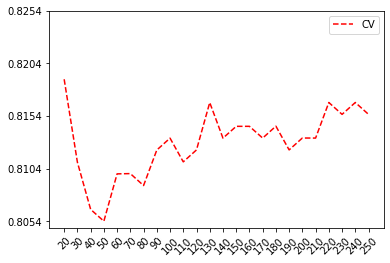

In [90]:
# plot the cross validation accuracies
fig, ax = plt.subplots()
ax.plot(estimators, cv_accs, '--r', label='CV')

plt.yticks(np.arange(min(cv_accs), max(cv_accs) + 0.01, 0.005))

#set y-axis ticks (step size=5)
plt.xticks(np.arange(min(estimators), max(estimators)+1, 10))
plt.xticks(rotation=45)
leg = ax.legend();

In [91]:
# we can see that the overall performance is more promising in the range [20, 50]
# let's try to focus on this range

# with a good visualization the optimal range can be easily seen

estimators_range = list(range(15, 25))
estimators_range.extend(list(range(125, 135)))

rf_t_params = {"n_estimators": estimators_range}
rf_searcher = GridSearchCV(estimator=rf_t, 
                            param_grid=rf_t_params, 
                            n_jobs=-1, 
                            scoring='accuracy', 
                            cv=5)

rf_searcher.fit(X_train, y_train)

rf_t = rf_searcher.best_estimator_


In [92]:
rf_pred = rf_t.predict(X_test)

# sub_1 = pd.DataFrame({"PassengerId": df_test_org['PassengerId'], "Survived": lr_pred}).astype(int)
sub_rf = pd.DataFrame({"PassengerId": df_test_org['PassengerId'],"Survived": rf_pred}).astype(int)

sub_rf.to_csv('sub_rf.csv', index=False)

### XGBoost Classifier

In [93]:
import xgboost as xgb

xgc = xgb.XGBClassifier(seed=123, objective="reg:logistic")

params = {'n_estimators': range(50, 100),
    'max_depth': [3, 4, 5], 
    "eta": [0.001, 0.01, 0.05, 0.1, 0.2],
    "subsample": [0.8, 0.9, 1], 
    "lambda": [0.01, 0.05, 0.1, 0,5, 0.8], 
}

xgb_t = GridSearchCV(xgc, param_grid=params, scoring='accuracy', cv=4, verbose=1)

xgb_t.fit(X_train, y_train)

Fitting 4 folds for each of 13500 candidates, totalling 54000 fits


GridSearchCV(cv=4, estimator=XGBClassifier(objective='reg:logistic', seed=123),
             param_grid={'eta': [0.001, 0.01, 0.05, 0.1, 0.2],
                         'lambda': [0.01, 0.05, 0.1, 0, 5, 0.8],
                         'max_depth': [3, 4, 5], 'n_estimators': range(50, 100),
                         'subsample': [0.8, 0.9, 1]},
             scoring='accuracy', verbose=1)

In [94]:
xgb_pred = xgb_t.predict(X_test)

sub_xgb = pd.DataFrame({"PassengerId": df_test_org['PassengerId'],"Survived": xgb_pred}).astype(int)

sub_xgb.to_csv('sub_xgb.csv', index=False)

In [95]:
def save_model_to_file(model_name, model, file_name):
  with open(file_name, "a") as f:
    f.write(model_name + ":\n")
    f.write(str(model.get_params()) + "\n")
    f.close() 

In [96]:
save_model_to_file("Random_Forest", rf_t, "best_models.txt")
save_model_to_file("XGBoost", xgb_t, "best_models.txt")

In [97]:
svm_params = {'gamma': [.1,0.2, 0.3, .5, 0.8, 0.9]}
svm_t = GridSearchCV(SVC(), param_grid=svm_params, cv=6, n_jobs=-1)
svm_t.fit(X_train, y_train)
model_best_version(svc_best, "NON-linear SVM")

NON-linear SVM
parameters 
{'C': 6.866488450042998, 'gamma': 0.1, 'kernel': 'rbf'}
best f1score 
0.8245435032347784


In [98]:
save_model_to_file("SVM", svm_t, "best_models.txt")

## Ensemble Learning
One promising approach is to gather the 3 best performing models: RandomForest, SVM and XGBoost in one model and use an ensemble learning technique such as votingClassifie

In [99]:
n_splits = 6
random_state = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

In [101]:
from sklearn.ensemble import VotingClassifier

vote_class = VotingClassifier(estimators=[("svm", svm_t), ('rf', rf_t), ('xgb', xgb_t)], voting='hard')
vote_class.fit(X_train, y_train)
# res = cross_val_score(vote_class, X_train, y_train, cv=kf)

save_model_to_file("voting classifier", vote_class, "best_models.txt")

Fitting 4 folds for each of 13500 candidates, totalling 54000 fits


In [102]:
vote_pred = vote_class.predict(X_test)

sub_vote = pd.DataFrame({"PassengerId": df_test_org['PassengerId'],"Survived": vote_pred}).astype(int)

sub_vote.to_csv('submission.csv', index=False)